In [1]:
import music21 as m21
import os
from GridMLM_tokenizers import CSGridMLMTokenizer
import numpy as np
from generate_utils import overlay_generated_harmony
import matplotlib.pyplot as plt

/home/maximos/miniconda3/envs/torch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# data_dir = '/media/maindisk/data/hooktheory_midi_hr/CA_train/'
data_dir = '/media/maindisk/data/gjt_melodies/gjt_CA/'
data_files = []
for dirpath, _, filenames in os.walk(data_dir):
    for file in filenames:
        if file.endswith('.mid') or file.endswith('.midi') or file.endswith('.mxl') or file.endswith('.xml'):
            full_path = os.path.join(dirpath, file)
            data_files.append(full_path)
print(len(data_files))

547


In [3]:
tokenizer = CSGridMLMTokenizer(fixed_length=256)

In [4]:
print(data_files[0])
x = tokenizer.encode( data_files[0] )
print(x['input_tokens'])

/media/maindisk/data/gjt_melodies/gjt_CA/Bohemia_After_Dark.mxl
['<bar>', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', '<bar>', 'B:hdim7', 'B:hdim7', 'B:hdim7', 'B:hdim7', 'B:hdim7', 'B:hdim7', 'B:hdim7', 'B:hdim7', 'E:7(b9)', 'E:7(b9)', 'E:7(b9)', 'E:7(b9)', 'E:7(b9)', 'E:7(b9)', 'E:7(b9)', 'E:7(b9)', '<bar>', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', '<bar>', 'B:hdim7', 'B:hdim7', 'B:hdim7', 'B:hdim7', 'B:hdim7', 'B:hdim7', 'B:hdim7', 'B:hdim7', 'E:7(b9)', 'E:7(b9)', 'E:7(b9)', 'E:7(b9)', 'E:7(b9)', 'E:7(b9)', 'E:7(b9)', 'E:7(b9)', '<bar>', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', 'A:min7', '<bar>', 'B:hdim7', 'B:hdim7', 'B:hdim7', 'B:hdim7', 'B:hd

In [6]:
# x = tokenizer.encode( 'example_inputs/test_midi_constraints.mid', keep_durations=True )
x = tokenizer.encode( data_files[10], keep_durations=True )
print(x['input_tokens'])
print(len(x['input_tokens']))
print(x.keys())
print(x['skip_steps'])
print(x['ql_per_quantum'])
print(x['pianoroll'].shape)

['<bar>', 'C:maj7', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<bar>', 'A:min7', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<bar>', 'D:min7', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<bar>', 'G:7', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', 'G#:dim7', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<bar>', 'A:min7', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<bar>', 'A:min7', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<bar>', 'F#:hdim7', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<bar>', 'F:minmaj7', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<bar>', 'F:maj7', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<bar>', 'D#:dim7', '<nc>', '<n

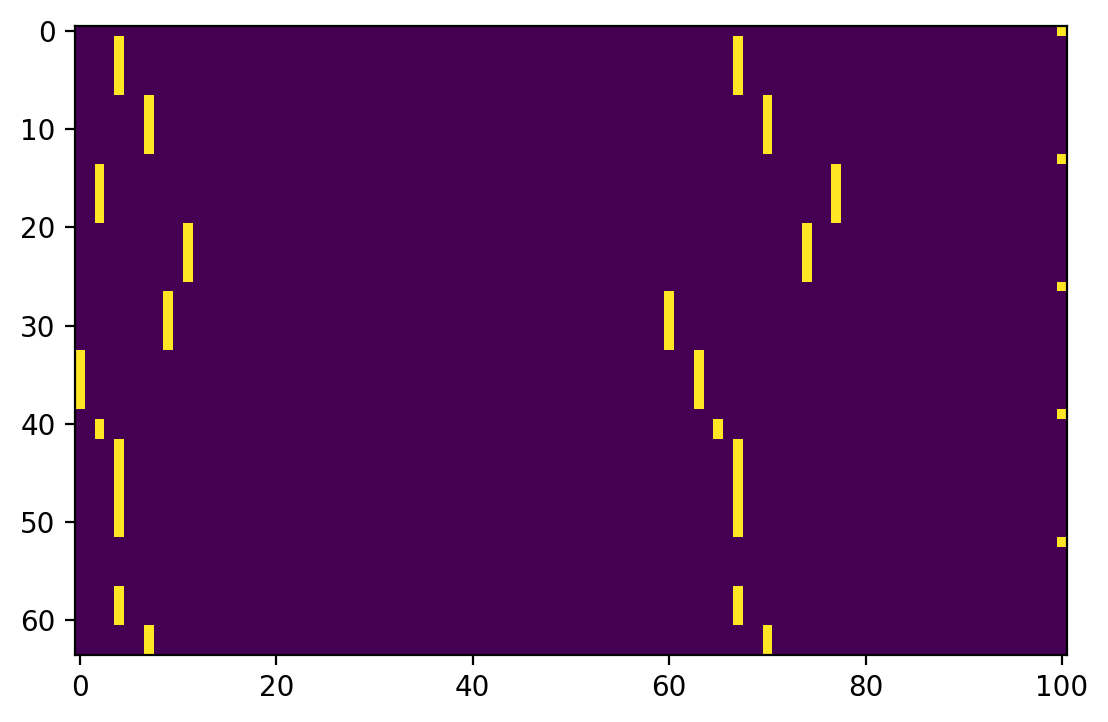

In [7]:
plt.imshow(x['pianoroll'][:64,:])

In [7]:
s = overlay_generated_harmony(x['melody_part'], x['input_tokens'], x['ql_per_quantum'], x['skip_steps'])

/home/maximos/miniconda3/envs/torch/lib/python3.12/site-packages/music21/base.py:559: UserWarning: Setting an ID that could be mistaken for a memory location is discouraged: got 130404102104768
  warnings.warn(msg)


In [8]:
s.show('t')

{0.0} <music21.stream.Part 0x769a11e24680>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.clef.BassClef>
        {0.0} <music21.tempo.MetronomeMark allegro moderato Quarter=128>
        {0.0} <music21.key.Key of G major>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Note G>
        {0.25} <music21.note.Rest eighth>
        {0.75} <music21.note.Note G>
        {1.25} <music21.note.Rest 16th>
        {1.5} <music21.note.Note G>
        {2.0} <music21.note.Note B>
        {2.5} <music21.note.Note G>
        {3.0} <music21.note.Note A>
        {3.5} <music21.note.Note G>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note G>
        {0.25} <music21.note.Rest eighth>
        {0.75} <music21.note.Note G>
        {1.25} <music21.note.Rest 16th>
        {1.5} <music21.note.Note G>
        {2.0} <music21.note.Note B>
        {2.5} <music21.note.Note D>
        {3.0} <music21.note.Note A>
        {3.5} <music21.no

In [8]:
m = m21.converter.parse('example_inputs/test_midi_constraints.mid')

In [10]:
p1 = m.parts[1]
c1 = p1.chordify()
f1 = c1.flatten()
p1.show('t')
c1.show('t')
f1.show('t')

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.instrument.Piano 'Piano, Piano: Piano, Piano'>
    {0.0} <music21.clef.BassClef>
    {0.0} <music21.key.Key of G major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.note.Rest whole>
{4.0} <music21.stream.Measure 2 offset=4.0>
    {0.0} <music21.note.Rest whole>
{8.0} <music21.stream.Measure 3 offset=8.0>
    {0.0} <music21.note.Rest whole>
{12.0} <music21.stream.Measure 4 offset=12.0>
    {0.0} <music21.note.Rest half>
    {2.0} <music21.chord.Chord D3 F#3 A3>
{16.0} <music21.stream.Measure 5 offset=16.0>
    {0.0} <music21.note.Rest whole>
{20.0} <music21.stream.Measure 6 offset=20.0>
    {0.0} <music21.note.Rest whole>
{24.0} <music21.stream.Measure 7 offset=24.0>
    {0.0} <music21.stream.Voice 0x7ad060b970e0>
        {0.0} <music21.note.Note G>
        {0.75} <music21.note.Rest 3.25ql>
    {0.0} <music21.stream.Voice 0x7ad060b97a70>
        {0.0} <music21.chord.Chord C3 E3>
        {3.75} <music21.note